# **APPROACH**
* Problem definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

# **About the probelm.**
* The goal is to understand the relationship between house features and how these
variables affect the house price. 

* Using more than one model, predict the price of the house using the given dataset. 
* To compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.

# **Data Used**
* Structured Data
* Provide by the company Shack Labs as An part of assignment.
* Link to the data = https://www.dropbox.com/sh/aypq6h3254207bs/AACzMLvo-XtK9sYAAma6FW0la?dl=0

# **Evaluation**
* Used 13 Different model for predicion.
    * LinearRegression
    * DecisionTreeRegressor
    * RandomForestRegressor
    * BaggingRegressor
    * GradientBoostingRegressor
    * ExtraTreesRegressor
    * HistGradientBoostingRegressor 
    * KNeighborsRegressor
    * SVR
    * XGBRegressor
    * LGBMRegressor
    * CatBoostRegressor
    * MLPRegressor

# **Final Model Recommended**
* Any one of the three :
  * **RandomForestRegressor**
  * **CatBoostRegressor**	
  * **ExtraTreesRegressor**

# Mounting the google drive to load the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the libraries important for data visulatisation and plotting. 

In [ ]:
#Import required module
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

## Reading the excel file of the input data and saving it in a dataframe.

In [ ]:
# Import training and validation sets
df=pd.read_excel("/content/drive/MyDrive/Internship_2/DS - Assignment Part 1 data set.xlsx")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


### Parsing the date column from the data to convert it from string to date time format.

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Internship_2/DS - Assignment Part 1 data set.xlsx",parse_dates = ["Transaction date"])

In [ ]:
df1["Transaction date"][:100]

0     2012.916667
1     2012.916667
2     2013.583333
3     2013.500000
4     2012.833333
         ...     
95    2012.916667
96    2013.416667
97    2013.083333
98    2013.416667
99    2013.416667
Name: Transaction date, Length: 100, dtype: float64

#### Plotting the data in accordance with the date of the purchase and price of the house .

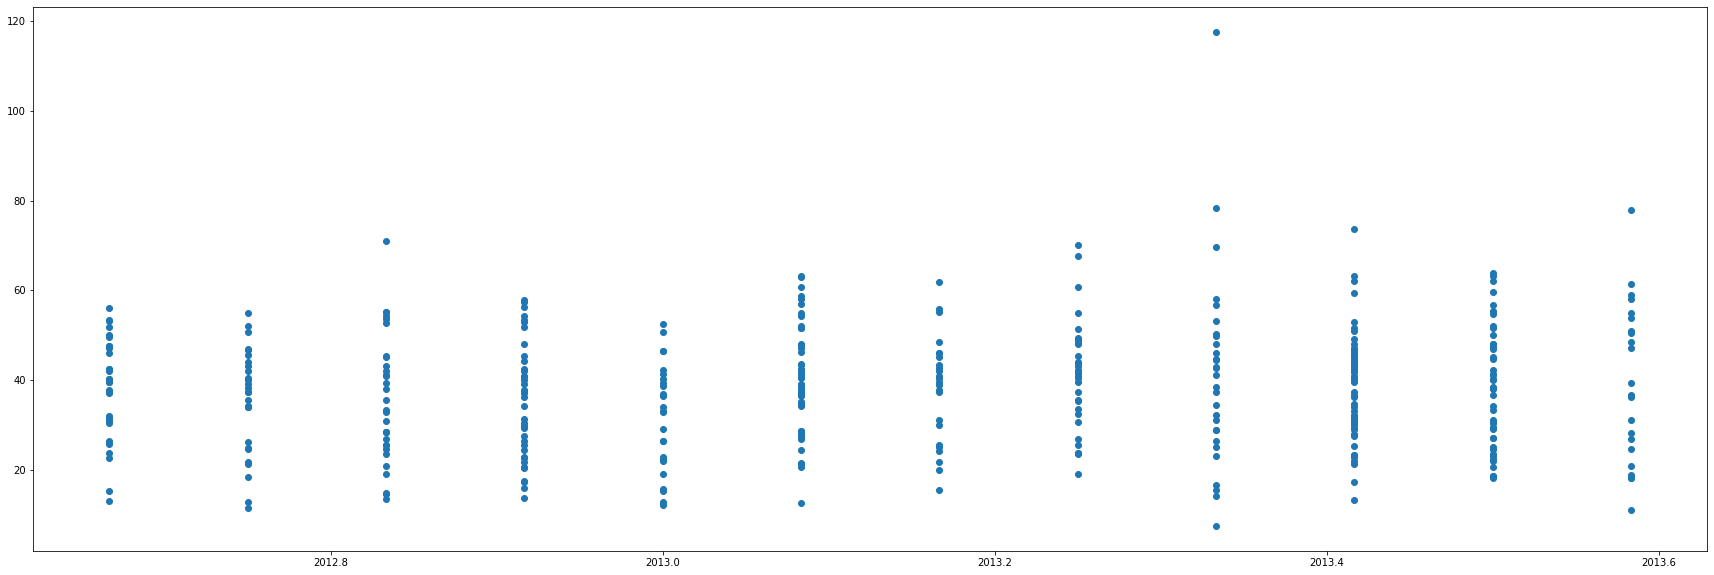

In [ ]:
fig,ax=plt.subplots(figsize=(30,10))
ax.scatter(df["Transaction date"][:1000],df["House price of unit area"][:1000])

# Making a copy of original database nd calculating the number of empty rows in the data.

In [ ]:
 df_copy = df.copy()

In [ ]:
df_copy.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

# Describing the data using `describe()` function and plotting the data for visualization.

In [ ]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


## 1.) Plotting the cluster map of the data.

<Figure size 1440x1440 with 0 Axes>

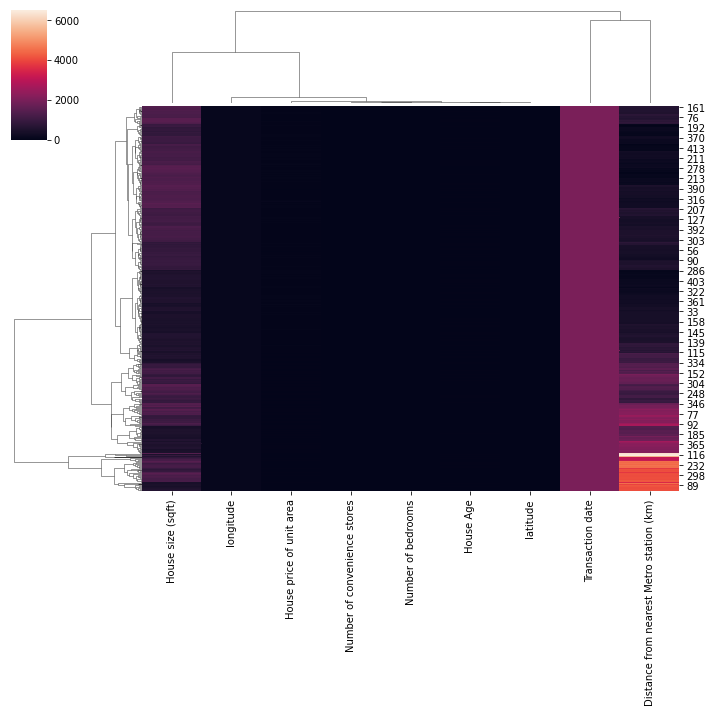

In [ ]:
plt.figure(figsize=(20,20))
sns.clustermap(df)

## 2.) Plotting the correlation matrix.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

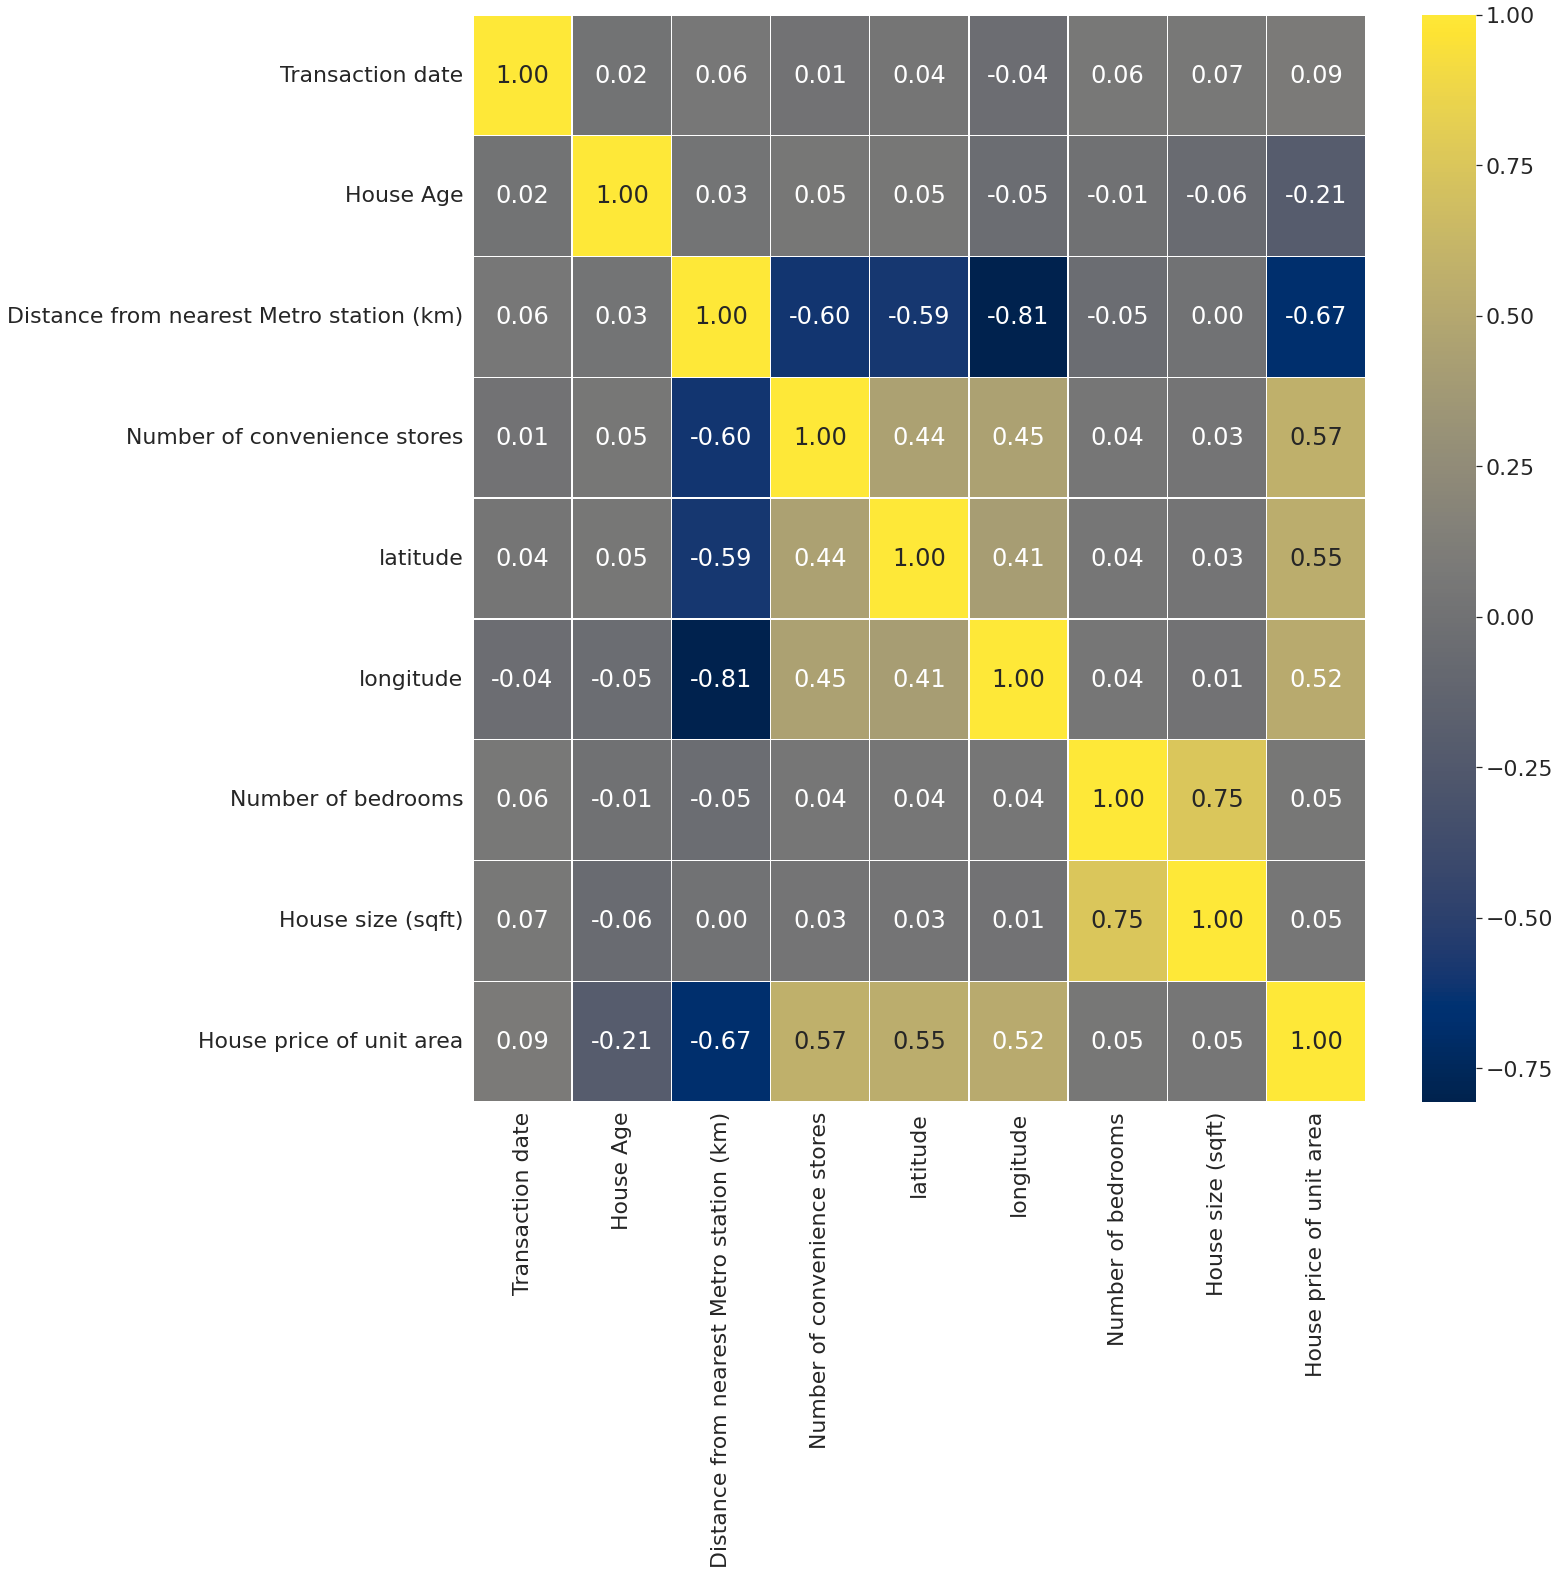

In [ ]:
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
sns.heatmap(df.corr()
            ,annot=True
            ,fmt='.2f'
            ,cmap='cividis'
           ,linewidths=0.5)
plt.yticks(rotation=0)


# **Model Selection and training**

## Splitting the data into x and y .

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

x= df_copy.drop("House price of unit area", axis = 1)
y = df_copy["House price of unit area"]

## Splitting the data into train and test set.

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

## Importing the model for checking the general performance and correctness of the available data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model  = RandomForestRegressor()
model.fit(x_train, y_train)

model.predict(x_test)

array([49.588, 38.177, 58.284, 33.013, 26.5  , 44.818, 48.2  , 52.253,
       14.699, 59.801, 25.551, 32.111, 35.311, 14.423, 35.875, 24.476,
       39.812, 53.116, 25.569, 38.396, 15.821, 24.332, 48.571, 51.714,
       14.308, 33.662, 17.537, 58.809, 49.907, 39.809, 20.168, 25.209,
       36.767, 25.306, 47.6  , 37.621, 55.469, 16.033, 45.609, 54.97 ,
       46.882, 40.705, 46.203, 38.298, 40.186, 50.773, 36.06 , 24.338,
       49.171, 45.709, 46.364, 55.793, 39.123, 38.39 , 38.283, 16.261,
       37.202, 27.34 , 25.014, 50.98 , 26.964, 24.045, 15.962, 14.098,
       20.585, 25.595, 27.461, 39.15 , 36.69 , 26.608, 40.559, 49.035,
       51.007, 49.414, 35.97 , 36.979, 38.827, 35.232, 45.195, 34.46 ,
       39.045, 48.386, 26.67 ])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("RMSE:",r2_score(y_test,model.predict(x_test)))

RMSE: 0.7937335119560072


# Different model selection for the prediction and comparing the R2 Score of ecah model.

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


## Importing different model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

### Making the list of different model .

In [ ]:
models  = [LinearRegression,DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor,KNeighborsRegressor,SVR,XGBRegressor,LGBMRegressor,CatBoostRegressor,MLPRegressor]

In [ ]:
R2_Scores = []
RMSE = []

## Defining a function which takes different model as input and storing the R2Scores and RMSE for different model.

In [ ]:
def fit_test_model(model):
    mod  = model()
    mod.fit(x_train, y_train)
    R2_Scores.append(r2_score(y_test,mod.predict(x_test)))
    RMSE.append(np.sqrt(mean_squared_error(y_test,mod.predict(x_test))))

In [ ]:
for model in models:
    fit_test_model(model)

[07:09:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.034381
0:	learn: 13.4969684	total: 48.5ms	remaining: 48.5s
1:	learn: 13.2676661	total: 52ms	remaining: 25.9s
2:	learn: 13.0421516	total: 54.8ms	remaining: 18.2s
3:	learn: 12.8167255	total: 60.9ms	remaining: 15.2s
4:	learn: 12.6037177	total: 73.4ms	remaining: 14.6s
5:	learn: 12.3815727	total: 78.4ms	remaining: 13s
6:	learn: 12.1532283	total: 94.3ms	remaining: 13.4s
7:	learn: 11.9659901	total: 95.7ms	remaining: 11.9s
8:	learn: 11.7711781	total: 101ms	remaining: 11.1s
9:	learn: 11.5965519	total: 106ms	remaining: 10.5s
10:	learn: 11.4240958	total: 112ms	remaining: 10.1s
11:	learn: 11.2514880	total: 115ms	remaining: 9.47s
12:	learn: 11.0940311	total: 122ms	remaining: 9.24s
13:	learn: 10.9302072	total: 123ms	remaining: 8.68s
14:	learn: 10.7733312	total: 128ms	remaining: 8.43s
15:	learn: 10.6223788	total: 130ms	remaining: 7.98s
16:	learn: 10.477

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Storing the prediction of different model in a dataframe.

In [ ]:
models_df  = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','BaggingRegressor','GradientBoostingRegressor','ExtraTreesRegressor','HistGradientBoostingRegressor','KNeighborsRegressor','SVR','XGBRegressor','LGBMRegressor','CatBoostRegressor','MLPRegressor']

In [ ]:
model_performances = pd.DataFrame([models_df,R2_Scores,RMSE]).T
model_performances.columns = ['Model','R2 Score','RMSE']
model_performances.set_index('Model',inplace=True)
model_performances = model_performances.sort_values('R2 Score',ascending=False)
model_performances

,R2 Score,RMSE
Model,,
ExtraTreesRegressor,0.823261,5.44515
HistGradientBoostingRegressor,0.811225,5.627504
XGBRegressor,0.805853,5.707012
CatBoostRegressor,0.800001,5.792394
GradientBoostingRegressor,0.799556,5.798836
LGBMRegressor,0.799226,5.803596
RandomForestRegressor,0.79096,5.921866
BaggingRegressor,0.782841,6.035778
KNeighborsRegressor,0.700604,7.087078


# **Hyperparameter tuning**

## Defining dictionary of parameter to be tuned for different model. 

In [ ]:
param_DTR =  {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
param_RFR =  {'n_estimators':[100,200, 350,500], 'min_samples_leaf':[2, 10, 30], 'bootstrap': [True,False]}
param_BR =   {'n_estimators':[100,350,500,750]}
param_GBR = {'n_estimators': np.arange(100,900,200), 'learning_rate': np.linspace(0,1,5), 'max_features': ['sqrt','log2'], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}
param_ETR =  {'n_estimators': [100,300,500,800,100], 'bootstrap': [True,False], 'max_features': ['sqrt','log2']}
param_HGBR = {'loss': ['squared_error', 'absolute_error', 'poisson'], 'learning_rate': [0.2,0.5,0.8,1]}
param_KNR =  {'n_neighbors':np.arange(1, 50),'metric': ['manhattan','euclidean','minkowski','chebyshev'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform','distance']}  
param_XGBR = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
param_LGBMR =  {'n_estimators': [100,300,600,900], 'learning_rate': [0.2,0.5,0.8,1]}
param_CBR =   {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
param_MLPR ={'activation':['identity', 'logistic', 'tanh', 'relu'],'learning_rate':['constant', 'invscaling', 'adaptive']}

In [ ]:
params = [param_DTR,param_RFR,param_BR,param_GBR,param_ETR,param_HGBR,param_KNR,param_XGBR,param_LGBMR,param_CBR,param_MLPR]

In [ ]:
models_GS  = {DecisionTreeRegressor:param_DTR,RandomForestRegressor:param_RFR,BaggingRegressor:param_BR,GradientBoostingRegressor:param_GBR,ExtraTreesRegressor:param_ETR,HistGradientBoostingRegressor:param_HGBR,KNeighborsRegressor:param_KNR,XGBRegressor:param_XGBR,LGBMRegressor:param_LGBMR,CatBoostRegressor:param_CBR,MLPRegressor:param_MLPR}

## Defining a function for tuning the hyprparameter.

In [ ]:
R2_Scores_GS= []
RMSE_GS = []
def GRID_SEARCH(model,param):
    grid= GridSearchCV(model(), param_grid=param, cv =5 ,verbose = 1) 
    grid.fit(x_train,y_train)
    R2_Scores_GS.append(r2_score(y_test,grid.predict(x_test)))
    RMSE_GS.append(np.sqrt(mean_squared_error(y_test,grid.predict(x_test))))

In [ ]:
for model , param in models_GS.items():
    GRID_SEARCH(model,param)

# Final R2 Scores for different tuned model.

In [ ]:
models_df  = ['DecisionTreeRegressor','RandomForestRegressor','BaggingRegressor','GradientBoostingRegressor','ExtraTreesRegressor','HistGradientBoostingRegressor','KNeighborsRegressor','XGBRegressor','LGBMRegressor','CatBoostRegressor','MLPRegressor']

In [ ]:
R2_Scores_GS

[0.7465249280584366,
 0.819227837417402,
 0.8028891027276457,
 0.7667652313593643,
 0.8086143927428449,
 0.7862329560777546,
 0.6957449007223357,
 0.8071935979163953,
 0.7865973532787126,
 0.8092862537482086,
 0.562079665054148]

In [ ]:
model_performances = pd.DataFrame([models_df,R2_Scores_GS,RMSE_GS]).T
model_performances.columns = ['Model','R2 Score','RMSE']
model_performances.set_index('Model',inplace=True)
model_performances = model_performances.sort_values('R2 Score',ascending=False)
model_performances

,R2 Score,RMSE
Model,,
RandomForestRegressor,0.819228,5.506931
CatBoostRegressor,0.809286,5.656332
ExtraTreesRegressor,0.808614,5.666286
XGBRegressor,0.807194,5.68728
BaggingRegressor,0.802889,5.750415
LGBMRegressor,0.786597,5.983341
HistGradientBoostingRegressor,0.786233,5.988448
GradientBoostingRegressor,0.766765,6.25519
DecisionTreeRegressor,0.746525,6.52096
